# Imports

In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt


import string
import nltk
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Data preprocessing

In [2]:
spam_dataset = pd.read_csv('spam.csv', encoding='ISO-8859-1', usecols=[0,1], names=['Spam','Text'], skiprows=1)
spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham','spam'],[0,1])
spam_dataset

,Spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [3]:
def remove_punctuation(text):
    cleaned = ''.join([word for word in text if word not in string.punctuation])
    return cleaned
spam_dataset['Cleaned_Text']=spam_dataset['Text'].apply(lambda x:remove_punctuation(x))

def tokenize(text):
    clean_text = text.lower()
    tokenized_text = nltk.word_tokenize(clean_text)
    return tokenized_text
spam_dataset['Tokenized_Text'] = spam_dataset['Cleaned_Text'].apply(lambda x: tokenize(x))

stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    without_stopwords = [word for word in text if word not in stopwords]
    return without_stopwords

spam_dataset['WithoutStop_Text'] = spam_dataset['Tokenized_Text'].apply(lambda x: remove_stopwords(x))
    
stemmer = nltk.PorterStemmer()
def stemming(text):
    stemmed_words = [stemmer.stem(word) for word in text]
    return stemmed_words
spam_dataset['Stemmed_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: stemming(x))
    
lemmater = nltk.WordNetLemmatizer()
def lemmatizing(text):
    lemmatized_words = [lemmater.lemmatize(word) for word in text]
    return lemmatized_words
spam_dataset['Lemmatized_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: lemmatizing(x))  


In [4]:
spam_dataset

,Spam,Text,Cleaned_Text,Tokenized_Text,WithoutStop_Text,Stemmed_Text,Lemmatized_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tri, 2, contact, u, u, å£750, poun...","[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]","[ì, b, going, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]","[pity, mood, soany, suggestion]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...","[guy, bitching, acted, like, id, interested, b..."


# Train test split

In [5]:
X = spam_dataset['Lemmatized_Text']
y = spam_dataset['Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization and Random Forest Classification with default settings

In [6]:
tfidf = TfidfVectorizer() 

tfidf_train = tfidf.fit_transform(X_train.apply(lambda x: ' '.join(x)))

tfidf_test = tfidf.transform(X_test.apply(lambda x: ' '.join(x)))

In [7]:
classifier = RandomForestClassifier()

classifier.fit(tfidf_train,y_train)

RandomForestClassifier()

In [8]:
print('Random Forest score is:' ,classifier.score(tfidf_test,y_test))

Random Forest score is: 0.9730941704035875


# Looking for features with meaning more than 0.001 and trainig new model

In [9]:
# feature_importances

importances = classifier.feature_importances_

importances.shape

(7818,)

In [10]:
# percentage of features with meaning more than 0.001
((importances>0.001).sum()/7818)*100

2.0209772320286516

In [11]:
tfidf_2 = TfidfVectorizer(min_df=0.02) 

tfidf_2_train = tfidf_2.fit_transform(X_train.apply(lambda x: ' '.join(x)))

tfidf_2_test = tfidf_2.transform(X_test.apply(lambda x: ' '.join(x)))

In [12]:
classifier_2 = RandomForestClassifier()

classifier_2.fit(tfidf_2_train,y_train)

RandomForestClassifier()

In [13]:
print('Random Forest with default settings score is:' ,classifier.score(tfidf_test,y_test))
print('Ramdom Forest for 2% of most meaningful features score is: ',classifier_2.score(tfidf_2_test,y_test))

Random Forest with default settings score is: 0.9730941704035875
Ramdom Forest for 2% of most meaningful features score is:  0.9551569506726457


# GridSearch for TF-IDF and Random Forest

In [14]:
random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(tfidf_train,y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 20, 'min_samples_leaf': 3}


In [15]:
tfidf = TfidfVectorizer()
params_tfidf = {'ngram_range': [(1,1),(1,2),(2,2)],
                'min_df':[0.01,0.02,0.03,0.04,0.05],
             'max_df': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
tfidf_gridsearch = GridSearchCV(tfidf,
                             params_tfidf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
tfidf_gridsearch.fit(X_train.apply(lambda x: ' '.join(x)),y_train)
print('\nBest hyperparameter:', tfidf_gridsearch.best_params_)
tfidf_model = tfidf_gridsearch.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best hyperparameter: {'max_df': 0.1, 'min_df': 0.01, 'ngram_range': (1, 1)}


# Pipeline

In [16]:
pipeline = Pipeline([
           ("tfidf", TfidfVectorizer(
           min_df=0.01,
           max_df=0.1, 
           ngram_range=(1,1))),
    
    
           ("random_forest",RandomForestClassifier(
             n_estimators=1000,
             n_jobs=-1,
             max_depth= 20, 
            min_samples_leaf= 3
             
             ) )
])

pipeline.fit(X_train.apply(lambda x: ' '.join(x)),y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.1, min_df=0.01)),
                ('random_forest',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=3,
                                        n_estimators=1000, n_jobs=-1))])

In [17]:
print('Random Forest with best hyperparameters score is: ', pipeline.score(X_test.apply(lambda x: ' '.join(x)),y_test))

Random Forest with best hyperparameters score is:  0.9542600896860987


In [19]:
predictions_lr = pipeline.predict(X_test.apply(lambda x: ' '.join(x)))
print('Predicted labels: ', predictions_lr[:5], predictions_lr[-5:])
print('Actual labels:    ' , y_test[:5], y_test[-5:])

Predicted labels:  [0 0 0 1 0] [0 1 0 0 0]
Actual labels:     2826    0
3695    0
3906    0
575     1
2899    0
Name: Spam, dtype: int64 854     0
5044    0
2015    0
3381    0
785     0
Name: Spam, dtype: int64


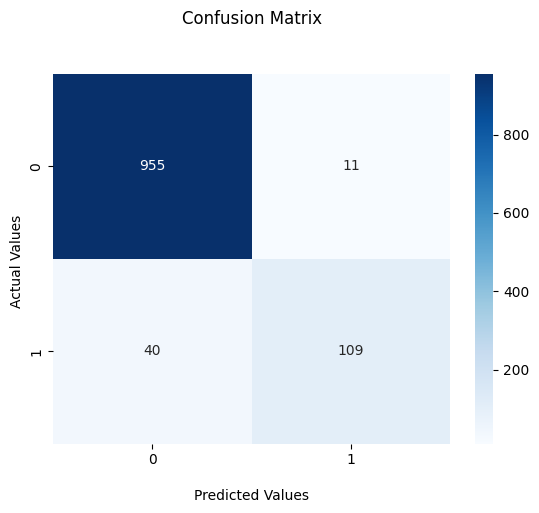

In [24]:
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [26]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       966
           1       0.91      0.73      0.81       149

    accuracy                           0.95      1115
   macro avg       0.93      0.86      0.89      1115
weighted avg       0.95      0.95      0.95      1115

